# Step 1: Importing Library and Data

In [69]:
import sklearn
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
import time as time
import os

In [70]:
os.chdir('D:\Pandas')
data = pd.read_csv("Autism-Child-Data.csv")
display(data.head(5))

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,class
0,1,1,0,0,1,1,0,1,0,0,...,m,Others,no,no,Jordan,no,5,'4-11 years',Parent,NO
1,1,1,0,0,1,1,0,1,0,0,...,m,'Middle Eastern ',no,no,Jordan,no,5,'4-11 years',Parent,YES
2,1,1,0,0,0,1,1,1,0,0,...,m,?,no,no,Jordan,yes,5,'4-11 years',?,YES
3,0,1,0,0,1,1,0,0,0,1,...,f,?,yes,no,Jordan,no,4,'4-11 years',?,YES
4,1,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,'United States',no,10,'4-11 years',Parent,YES


In [71]:
# Number of records where individual's with ASD
n_asd_yes = len(data[data['class'] == 'YES'])

#Number of records where individual's with no ASD
n_asd_no = len(data[data['class'] == 'NO'])

# Total number of records
n_records = len(data.index)

#Percentage of individuals whose are with ASD
yes_percent = float(n_asd_yes) / n_records *100

print("Individuals diagonised with ASD: ",n_asd_yes)
print("Individuals not diagonised with ASD: ",n_asd_no)
print("Percentage of individuals diagonised with ASD: ", yes_percent)

Individuals diagonised with ASD:  199
Individuals not diagonised with ASD:  93
Percentage of individuals diagonised with ASD:  68.15068493150685


In [9]:
asd_data = pd.read_csv('Autism-Child-Data.csv', na_values=['?'])
asd_data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,class
0,1,1,0,0,1,1,0,1,0,0,...,m,Others,no,no,Jordan,no,5,'4-11 years',Parent,NO
1,1,1,0,0,1,1,0,1,0,0,...,m,'Middle Eastern ',no,no,Jordan,no,5,'4-11 years',Parent,NO
2,1,1,0,0,0,1,1,1,0,0,...,m,NaN,no,no,Jordan,yes,5,'4-11 years',NaN,NO
3,0,1,0,0,1,1,0,0,0,1,...,f,NaN,yes,no,Jordan,no,4,'4-11 years',NaN,NO
4,1,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,'United States',no,10,'4-11 years',Parent,YES


In [10]:
asd_data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,288.000000,292.000000
mean,0.633562,0.534247,0.743151,0.551370,0.743151,0.712329,0.606164,0.496575,0.493151,0.726027,6.354167,6.239726
std,0.482658,0.499682,0.437646,0.498208,0.437646,0.453454,0.489438,0.500847,0.500811,0.446761,2.365456,2.284882
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,5.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,6.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,10.000000


# Exploratory Data Analysis

## Does gender corresponds to ASD?

In [11]:
data['gender'].value_counts()

asd_data['gender'].value_counts()

m    208
f     84
Name: gender, dtype: int64

#### So, assigning 1 to m(i.e. male) and 0 to f(i.e. female)

In [12]:
asd_data['gender'] = asd_data['gender'].apply(lambda val : 1 if val == 'm' else 0 if val == 'f' else val)
pd.DataFrame(asd_data.groupby(['gender','austim']).count()['age'])

age
gender austim     
0      no       66
       yes      18
1      no      173
       yes      31

In [13]:
gender_details = pd.DataFrame(asd_data.groupby(['gender','austim']).count()['age'])
gender_details.columns = ['gender_wise_count']
gender_details.reset_index(inplace=True)

Text(0.5, 1.0, 'Gender wise ASD/Non-ASD count')

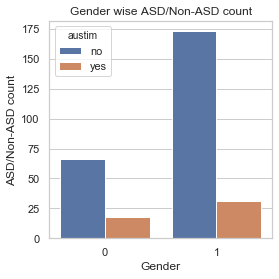

In [14]:

plt.figure(figsize=(4,4))
sns.barplot(x=gender_details['gender'],y=gender_details['gender_wise_count'],hue=gender_details['austim'])
plt.minorticks_on()
plt.xlabel('Gender')
plt.ylabel('ASD/Non-ASD count')
plt.title('Gender wise ASD/Non-ASD count')

## Does used_app_before corresponds to ASD?

In [15]:
asd_data['used_app_before'].value_counts()

no     281
yes     11
Name: used_app_before, dtype: int64

#### So, assigning 1 to yes and 0 to no

In [16]:
asd_data['used_app_before'] = asd_data['used_app_before'].apply(lambda val : 1 if val == 'yes' else 0 if val == 'no' else val)

In [17]:
asd_data['used_app_before'].value_counts()

0    281
1     11
Name: used_app_before, dtype: int64

In [18]:
pd.DataFrame(asd_data.groupby(['used_app_before','austim']).count()['age'])

age
used_app_before austim     
0               no      229
                yes      49
1               no       10

In [19]:
used_app_before_details = pd.DataFrame(asd_data.groupby(['used_app_before','austim']).count()['age'])
used_app_before_details.columns = ['used_app_before_details_wise_count']
used_app_before_details.reset_index(inplace=True)

Text(0.5, 1.0, 'used_app_before wise ASD/Non-ASD count')

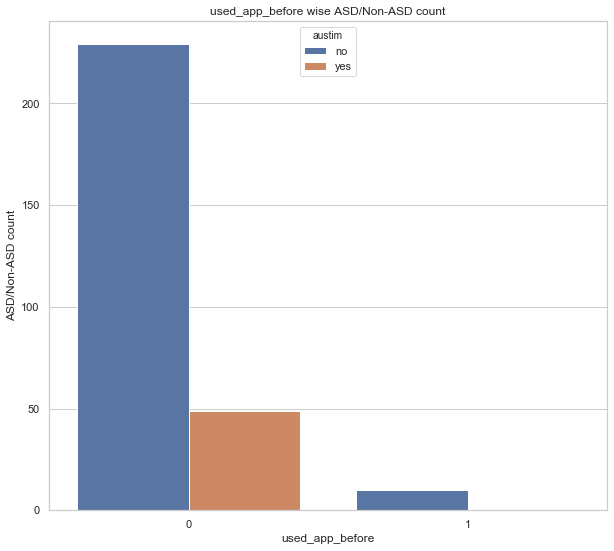

In [20]:
plt.figure(figsize=(10,9))
sns.barplot(x=used_app_before_details['used_app_before'],y=used_app_before_details['used_app_before_details_wise_count'],hue=used_app_before_details['austim'])
plt.minorticks_on()
plt.xlabel('used_app_before')
plt.ylabel('ASD/Non-ASD count')
plt.title('used_app_before wise ASD/Non-ASD count')

## Does ethnicity corresponds to ASD?

In [21]:
pd.DataFrame(asd_data['ethnicity'].value_counts())

,ethnicity
White-European,108
Asian,46
'Middle Eastern ',27
'South Asian',21
Black,14
Others,14
Latino,8
Hispanic,7
Pasifika,2
Turkish,2


In [22]:
ethnicity_details = pd.DataFrame(asd_data.groupby(['ethnicity','austim']).count()['age'])
ethnicity_details.columns = ['gender']
ethnicity_details.reset_index(inplace=True)
ethnicity_details

,ethnicity,austim,gender
0,'Middle Eastern ',no,23
1,'Middle Eastern ',yes,3
2,'South Asian',no,20
3,'South Asian',yes,1
4,Asian,no,41
5,Asian,yes,5
6,Black,no,12
7,Black,yes,2
8,Hispanic,no,6
9,Hispanic,yes,1


Text(0.5, 1.0, 'Ethnicity wise -- Counts of ASD and Non-ASD children')

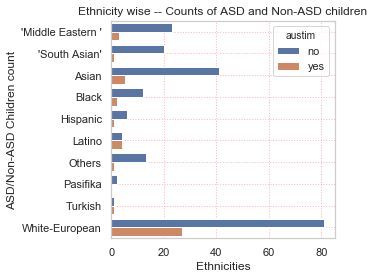

In [23]:
plt.figure(figsize=(4,4))
sns.barplot(x=ethnicity_details['gender'],y=ethnicity_details['ethnicity'],hue=ethnicity_details['austim'])
plt.grid(which='major',linestyle=':',color='lightpink')
plt.xlabel("Ethnicities")
plt.ylabel('ASD/Non-ASD Children count')
plt.title('Ethnicity wise -- Counts of ASD and Non-ASD children')

## Does BIRTH JAUNDICE corresponds to ASD?

In [24]:
asd_data['jundice'].value_counts()
asd_data['jundice'] = asd_data['jundice'].apply(lambda val: 1 if val =='yes' else 0)
asd_data['jundice'].value_counts()

0    212
1     80
Name: jundice, dtype: int64

In [25]:
pd.DataFrame(asd_data.groupby(['jundice','austim']).count()['age'])

age
jundice austim     
0       no      172
        yes      38
1       no       67
        yes      11

In [26]:
jaundice_details = pd.DataFrame(asd_data.groupby(['jundice','austim']).count()['age'])
jaundice_details.columns = ['jundice_wise_counts']
jaundice_details.reset_index(inplace=True)
jaundice_details

,jundice,austim,jundice_wise_counts
0,0,no,172
1,0,yes,38
2,1,no,67
3,1,yes,11


Text(0.5, 1.0, 'Jaundice wise -- Counts of ASD and Non-ASD children')

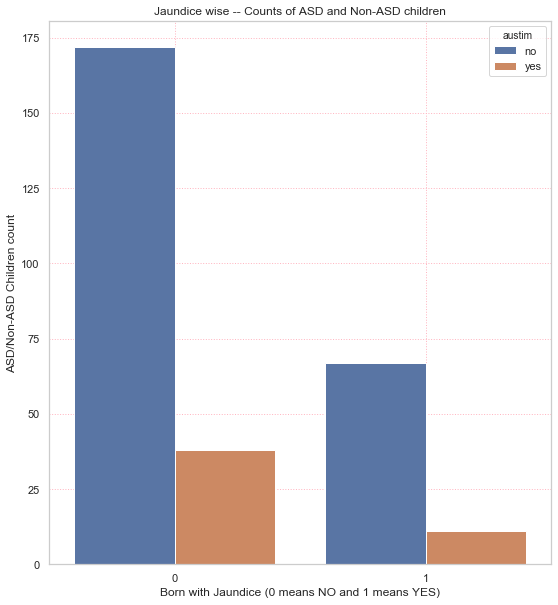

In [27]:
plt.figure(figsize=(9,10))
sns.barplot(x=jaundice_details['jundice'],y=jaundice_details['jundice_wise_counts'],hue=jaundice_details['austim'])
plt.grid(which='major',linestyle=':',color='lightpink')
plt.xlabel('Born with Jaundice (0 means NO and 1 means YES)')
plt.ylabel('ASD/Non-ASD Children count')
plt.title('Jaundice wise -- Counts of ASD and Non-ASD children')

# 1-Missing data 

In [28]:
asd_data.loc[(asd_data['age'].isnull()) |(asd_data['gender'].isnull()) |(asd_data['ethnicity'].isnull()) 
            |(asd_data['jundice'].isnull())|(asd_data['austim'].isnull()) |(asd_data['contry_of_res'].isnull())
            |(asd_data['used_app_before'].isnull())|(asd_data['result'].isnull())|(asd_data['age_desc'].isnull())
            |(asd_data['relation'].isnull())]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,class
2,1,1,0,0,0,1,1,1,0,0,...,1,NaN,0,no,Jordan,1,5,'4-11 years',NaN,NO
3,0,1,0,0,1,1,0,0,0,1,...,0,NaN,1,no,Jordan,0,4,'4-11 years',NaN,NO
5,0,0,1,0,1,1,0,1,0,1,...,1,NaN,0,yes,Egypt,0,5,'4-11 years',NaN,NO
9,0,0,1,1,1,0,1,1,0,0,...,0,NaN,0,yes,Austria,0,5,'4-11 years',NaN,NO
11,0,1,0,0,1,0,0,0,0,1,...,0,NaN,0,no,Kuwait,0,3,'4-11 years',NaN,NO
19,1,1,1,1,1,1,0,1,0,1,...,1,NaN,0,no,Egypt,0,8,'4-11 years',NaN,YES
21,0,0,1,1,0,1,0,1,1,0,...,0,NaN,0,no,Egypt,0,5,'4-11 years',NaN,NO
24,1,0,1,1,1,1,0,1,1,1,...,1,NaN,0,no,Egypt,0,8,'4-11 years',NaN,YES
28,0,1,1,0,0,0,1,1,0,1,...,1,NaN,0,yes,'United Arab Emirates',0,5,'4-11 years',NaN,NO
32,1,0,0,1,0,1,1,1,1,1,...,1,NaN,0,no,Egypt,0,7,'4-11 years',NaN,YES


# 2-Cleaning the data

In [29]:
asd_raw = asd_data['class']
features_raw = asd_data[['age', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'result',
                      'used_app_before','relation','A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score',
                      'A9_Score','A10_Score']]

In [30]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical = ['age', 'result']

features_minmax_transform = pd.DataFrame(data = features_raw)
features_minmax_transform[numerical] = scaler.fit_transform(features_raw[numerical])
features_minmax_transform

display(features_minmax_transform.head(n = 5))

,age,gender,ethnicity,jundice,austim,contry_of_res,result,used_app_before,relation,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score
0,0.285714,1,Others,0,no,Jordan,0.5,0,Parent,1,1,0,0,1,1,0,1,0,0
1,0.285714,1,'Middle Eastern ',0,no,Jordan,0.5,0,Parent,1,1,0,0,1,1,0,1,0,0
2,0.285714,1,NaN,0,no,Jordan,0.5,1,NaN,1,1,0,0,0,1,1,1,0,0
3,0.142857,0,NaN,1,no,Jordan,0.4,0,NaN,0,1,0,0,1,1,0,0,0,1
4,0.142857,1,Others,1,no,'United States',1.0,0,Parent,1,1,1,1,1,1,1,1,1,1


# 3-One-hot encoding

In [31]:
#One-hot encode the 'features_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_minmax_transform)
display(features_final.head(5))

# Encode the 'all_classes_raw' data to numerical values
asd_classes = asd_raw.apply(lambda x: 1 if x == 'YES' else 0)

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding. ".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print(encoded)

,age,gender,jundice,result,used_app_before,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,...,contry_of_res_Romania,contry_of_res_Russia,contry_of_res_Sweden,contry_of_res_Syria,contry_of_res_Turkey,relation_'Health care professional',relation_Parent,relation_Relative,relation_Self,relation_self
0,0.285714,1,0,0.5,0,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0.285714,1,0,0.5,0,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0.285714,1,0,0.5,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.142857,0,1,0.4,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.142857,1,1,1.0,0,1,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0


84 total features after one-hot encoding. 
['age', 'gender', 'jundice', 'result', 'used_app_before', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', "ethnicity_'Middle Eastern '", "ethnicity_'South Asian'", 'ethnicity_Asian', 'ethnicity_Black', 'ethnicity_Hispanic', 'ethnicity_Latino', 'ethnicity_Others', 'ethnicity_Pasifika', 'ethnicity_Turkish', 'ethnicity_White-European', 'austim_no', 'austim_yes', "contry_of_res_'Costa Rica'", "contry_of_res_'Isle of Man'", "contry_of_res_'New Zealand'", "contry_of_res_'Saudi Arabia'", "contry_of_res_'South Africa'", "contry_of_res_'South Korea'", "contry_of_res_'U.S. Outlying Islands'", "contry_of_res_'United Arab Emirates'", "contry_of_res_'United Kingdom'", "contry_of_res_'United States'", 'contry_of_res_Afghanistan', 'contry_of_res_Argentina', 'contry_of_res_Armenia', 'contry_of_res_Australia', 'contry_of_res_Austria', 'contry_of_res_Bahrain', 'contry_of_res_Bangladesh', '

# Step 2: Data Visualization

Text(0, 0.5, 'Frequency')

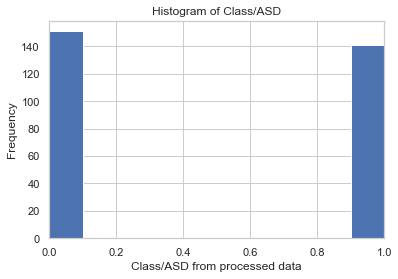

In [32]:
plt.hist(asd_classes, bins=10)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of Class/ASD')
plt.xlabel('Class/ASD from processed data')
plt.ylabel('Frequency')

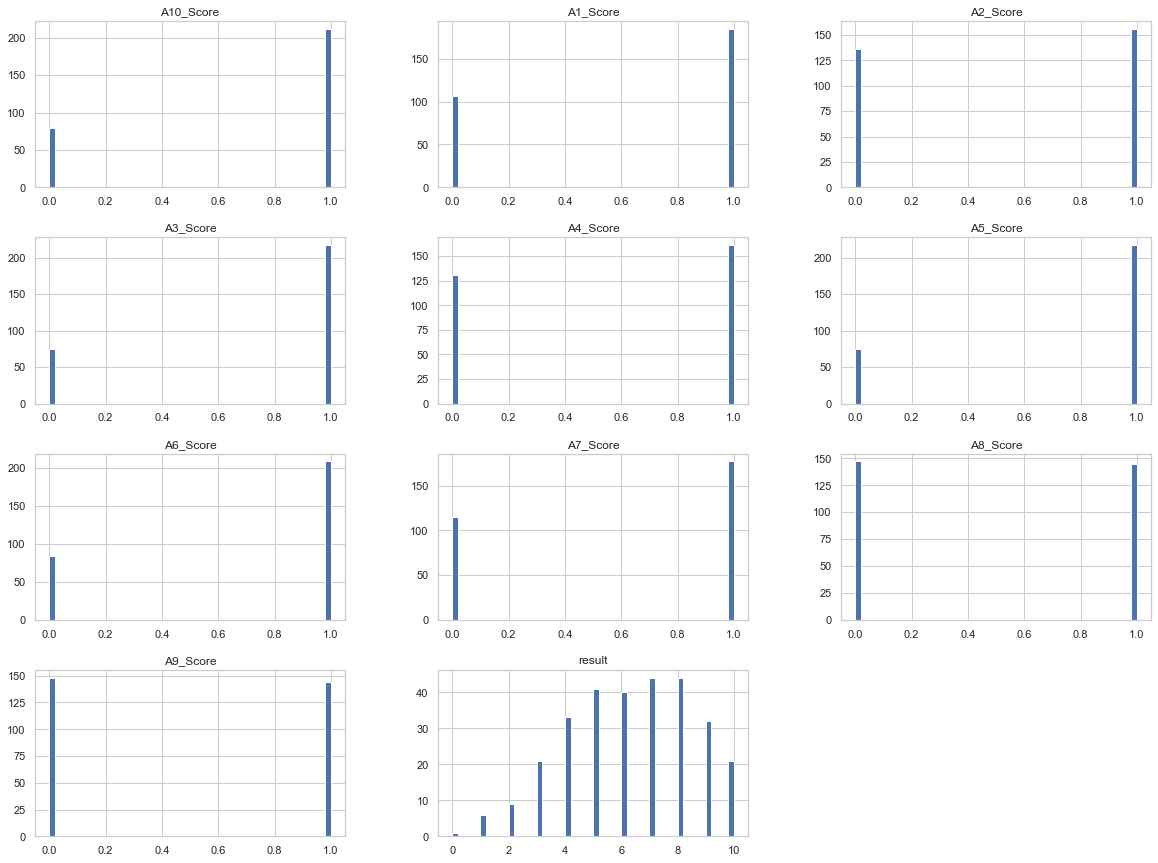

In [33]:
data.hist(bins=50, figsize=(20,15))
plt.show()

D:\Users\sivaji\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


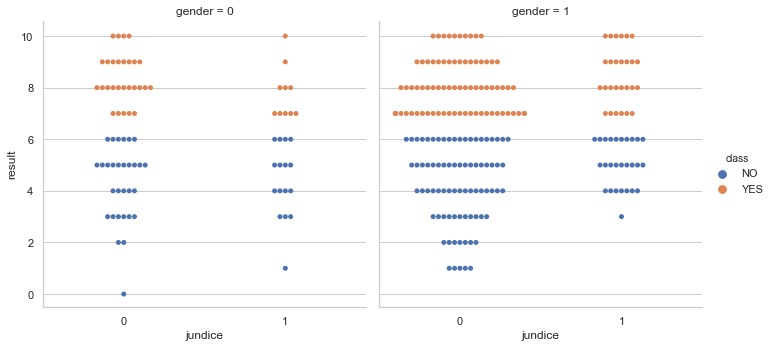

In [34]:
sns.factorplot(x="jundice", y="result", hue="class", col="gender", data=asd_data, kind="swarm");

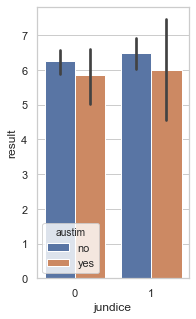

In [35]:
plt.figure(figsize=(6, 5))
plt.subplot(1,2,1)
sns.barplot(x = 'jundice', y = 'result',hue="austim", data = asd_data[0:])

# Step 3: Modelling

In [36]:
from sklearn.model_selection import train_test_split

np.random.seed(1234)

X_train, X_test, y_train, y_test = train_test_split(features_final, asd_classes, train_size=0.80, random_state=1)


# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))
#asd_data

Training set has 233 samples.
Testing set has 59 samples.


In [37]:
y_test[y_test==np.inf]=np.nan
y_test.fillna(y_test.median(), inplace=True)

In [38]:
X_train[X_train==np.inf]=np.nan
X_train.fillna(X_train.median(), inplace=True)

D:\Users\sivaji\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Users\sivaji\Anaconda3\lib\site-packages\pandas\core\frame.py:3515: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)
D:\Users\sivaji\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_

# Method 1: Decision Trees

In [39]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dectree = DecisionTreeClassifier(random_state=1)

# Train the classifier on the training set
dectree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

# Evaluating Model

In [40]:
y_pred_class = dectree.predict(X_test)

In [41]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('False:', y_pred_class[0:25])

True: [0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 1]
False: [0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 1]


In [42]:
from sklearn import metrics
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
#print(metrics.confusion_matrix(y_test, y_pred_class))

# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[28  0]
 [ 0 31]]


# Metrics

### 1: Classification Accuracy– how often the classifier makes the correct prediction

In [43]:
acc= (TP + TN) / float(TP + TN + FP + FN)
print(acc)

1.0


In [44]:
classification_score = (FP + FN) / float(TP + TN + FP + FN)

print(classification_score)

0.0


###  2:  Sensitivity– When the actual value is positive, how often is the prediction correct?

In [45]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test, y_pred_class))

1.0
1.0


###  3: False Positive Rate– When the actual value is negative, how often is the prediction incorrect?

In [46]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
#print(1 - specificity)

0.0


### 4: Precision– How accurate our positive predictions were?

In [47]:

precision = TP / float(TP + FP)

#print(precision)
print(metrics.precision_score(y_test, y_pred_class))

1.0


In [48]:

# print the first 10 predicted responses
# 1D array (vector) of binary values (0, 1)
dectree.predict(X_test)[0:10]

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 0], dtype=int64)

In [49]:
dectree.predict_proba(X_test)[0:10]

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [50]:
asd_classes.replace([np.inf, -np.inf], np.nan, inplace=True)
features_final.replace([np.inf, -np.inf], np.nan, inplace=True)
asd_classes.fillna(asd_classes.mean(), inplace=True)
features_final.fillna(asd_classes.mean(), inplace=True)

### Cross Validation:  Resampling procedure used to evaluate models on a limited data sample. 

In [51]:
from sklearn.model_selection import cross_val_score

dectree = DecisionTreeClassifier(random_state=2)

cv_scores = cross_val_score(dectree, features_final, asd_classes, cv=10)

cv_scores.mean()

1.0

In [52]:
## AUC SCORE : its a percentage of ROC plot
from sklearn.model_selection import cross_val_score
cross_val_score(dectree, features_final, asd_classes, cv=10, scoring='roc_auc').mean()

1.0

# Method 2: Random Forest

In [53]:

from sklearn.ensemble import RandomForestClassifier

ranfor = RandomForestClassifier(n_estimators=5, random_state=1)
ranfor.fit(X_train,y_train)
cv_scores = cross_val_score(ranfor, features_final, asd_classes, cv=10)
cv_scores.mean()

0.9758620689655173

In [54]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(ranfor, features_final, asd_classes, cv=10, scoring='roc_auc').mean()

0.9971428571428571

In [68]:
from sklearn.metrics import fbeta_score
predictions_test = ranfor.predict(X_test)
print(predictions_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

[0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 1
 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0]


1.0

| Algorithm| Cross_Val | Accuracy |
| --- | --- | --- |
| Random Forest | 0.99 | 94% |

# Method 3: Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
cv_scores = cross_val_score(logreg, features_final, asd_classes, cv=10)
cv_scores.mean()

D:\Users\sivaji\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Users\sivaji\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Users\sivaji\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Users\sivaji\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Users\sivaji\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

0.9489432703003337

In [57]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cv_scores_roc = cross_val_score(logreg, features_final, asd_classes, cv=10, scoring='roc_auc').mean()
cv_scores_roc.mean()

D:\Users\sivaji\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Users\sivaji\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Users\sivaji\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Users\sivaji\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Users\sivaji\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

0.9876190476190476

In [67]:
from sklearn.metrics import fbeta_score
predictions_test = logreg.predict(X_test)
print(predictions_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

[0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0]


0.9523809523809523

| Algorithm| Cross_Val | Accuracy |
| --- | --- | --- |
| Logistic Regression | 0.99 | 95% |

# Method 4: K-Nearest-Neighbors

In [59]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=10)
cv_scores = cross_val_score(knn, features_final, asd_classes, cv=10)

cv_scores.mean()

0.8832035595105673

In [60]:
cross_val_score(knn, features_final, asd_classes, cv=10, scoring='roc_auc').mean()

0.9671726190476191

In [66]:
knn.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = knn.predict(X_test)
print(predictions_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

[1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1
 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1 0]


0.9281437125748502

| Algorithm| Cross_Val | Accuracy |
| --- | --- | --- |
| K-Nearest-Neighbors | 0.96 | 85% |

In [62]:
from sklearn import neighbors
for n in range(10, 50):
    knn = neighbors.KNeighborsClassifier(n_neighbors=n)
    cv_scores = cross_val_score(knn, features_final, asd_classes, cv=10)
    print (n, cv_scores.mean())

10 0.8832035595105673
11 0.8763070077864293
12 0.8797552836484982
13 0.8694104560622915
14 0.893548387096774
15 0.8696329254727475
16 0.893548387096774
17 0.8763070077864293
18 0.900222469410456
19 0.8696329254727475
20 0.8868743047830924
21 0.8661846496106784
22 0.8898776418242493
23 0.8730812013348164
24 0.8832035595105673
25 0.8696329254727475
26 0.8765294771968855
27 0.8765294771968855
28 0.8834260289210233
29 0.8765294771968855
30 0.8868743047830921
31 0.8730812013348164
32 0.8901001112347051
33 0.8797552836484984
34 0.8832035595105673
35 0.8694104560622913
36 0.8933259176863182
37 0.8797552836484984
38 0.8829810901001112
39 0.8728587319243605
40 0.8866518353726363
41 0.8728587319243605
42 0.8763070077864293
43 0.8763070077864293
44 0.8797552836484984
45 0.8763070077864293
46 0.8866518353726363
47 0.8765294771968855
48 0.8864293659621802
49 0.8795328142380422


# Method 5: Naive Bayes

In [63]:

from sklearn.naive_bayes import MultinomialNB

#scaler = preprocessing.MinMaxScaler()
#all_features_minmax = scaler.fit_transform(all_features)

nb = MultinomialNB()
cv_scores = cross_val_score(nb, features_final, asd_classes, cv=10)

cv_scores.mean()

0.736040044493882

In [64]:
cross_val_score(nb, features_final, asd_classes, cv=10, scoring='roc_auc').mean()

0.8433333333333334

In [65]:
nb.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = nb.predict(X_test)
print(predictions_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

[0 1 0 0 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1
 1 0 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0]


0.7784431137724551

| Algorithm| Cross_Val | Accuracy |
| --- | --- | --- |
| Naive Bayes | 0.84 | 77% |

# For GUI

In [61]:

from tkinter import *

from PIL import Image, ImageTk

import random

questions = [
    " Does s/he join in playing games with other children easily?",
    "Does s/he come up to you spontaneously for a chat?",
    " Was s/he speaking by 2 years old?",
    " Does s/he enjoy sports?",
    " Is it important to him/her to fit in with the peer group?",
    " Does s/he appear to notice unusual details that others miss?",
    " Does s/he tend to take things literally?",
    " Does s/he like to do things over and over again, in the same way all the time?",
    " Can s/he keep a two-way conversation going?",
    " Does s/he find it easy to interact with other children?",
]

answers_choice = [
      ["0", "1","0","1", ],
      ["0", "1","0","1", ],
      ["0", "1","0","1", ],
      ["0", "1","0","1", ],
      ["0", "1","0","1", ],
      ["0", "1","0","1", ],
      ["0", "1","0","1", ],
     ["0", "1","0","1", ],
     ["0", "1","0","1", ],
         ["0", "1","0","1", ],
]

answers = [1, 1, 1, 1, 0, 1, 0, 1, 1, 0]

user_answer = []

indexes = []


def gen():
    global indexes
    while len(indexes) < 5:
        x = random.randint(0, 9)
        if x in indexes:
            continue
        else:
            indexes.append(x)

    # print(indexes)

def showresult(score):
    lblquestion.destroy()
    r1.destroy()
    r2.destroy()
    r3.destroy()
    r4.destroy()
    labelimage = Label(
        window,

    )
    labelimage.pack(),
    labelresulttext = Label(
        window,
        font=("Consolas", 20)
    )
    labelresulttext.pack()
    if score >= 10:
        labelresulttext.configure(text="You are autistic")
    elif 5 <= score < 10:
        labelresulttext.configure(text="You are not autistic")
    else:
        labelresulttext.configure(text="You are  autistic")



def calc():
    global indexes, user_answer, answers
    x = 0
    score = 0
    for i in indexes:
        if user_answer[x] == answers[i]:
            score = score + 5
        x += 1
    #print(score)
    showresult(score)



ques = 1

def selected():
    global radiovar, user_answer
    global lblquestion, r1, r2, r3, r4
    global ques
    x = radiovar.get()
    user_answer.append(x)
    radiovar.set(-1)
    # print(x)
    if ques < 5:
        lblquestion.config(text=questions[indexes[ques]])
        r1['text'] = answers_choice[indexes[ques]][0]
        r2['text'] = answers_choice[indexes[ques]][1]
        r3['text'] = answers_choice[indexes[ques]][2]
        r4['text'] = answers_choice[indexes[ques]][3]
        ques += 1

    else:
       # print(indexes)
        #print(user_answer)
        calc()

def startquiz():
    global lblquestion, r1, r2, r3, r4
    lblquestion = Label(
        window,
        text=questions[indexes[0]],
        font=("Consolas", 14),
        width=500,
        justify="center",
        wraplength=400,
        background="#ffffff")

    lblquestion.pack(pady=(100, 30))

    global radiovar
    radiovar = IntVar()
    radiovar.set(-1)
#For radio buttons for every question
    r1 = Radiobutton(
        window,
        text=answers_choice[indexes[0]][0],
        font=("Times", 12),
        value=0,
        variable=radiovar,
        command=selected,
        background="#ffffff",
    )
    r1.pack(pady=5)

    r2 = Radiobutton(
        window,
        text=answers_choice[indexes[0]][1],
        font=('Times', 12),
        value=1,
        variable=radiovar,
        command=selected,
        background="#ffffff"

    )
    r2.pack(pady=5)

    r3 = Radiobutton(
        window,
        text=answers_choice[indexes[0]][2],
        font=('Times', 12),
        value=2,
        variable=radiovar,
        command=selected,
        background="#ffffff"

    )
    r3.pack(pady=5)

    r4 = Radiobutton(
        window,
        text=answers_choice[indexes[0]][3],
        font=('Times', 12),
        value=3,
        variable=radiovar,
        command=selected,
        background="#ffffff"

    )
    r4.pack(pady=5)


def startIsPressed():
    labetext.destroy()
    lblrules.destroy()
    labelinstruction.destroy()
    btnstrt.destroy()
    gen()
    startquiz()


window = Tk()
window.title("GUI")
window.geometry('450x450')
window.config(background="#ffffff")
window.resizable(0, 0)

labetext = Label(
    window,
    text="Screening Tool",
    font=("Comic sans MS", 24, "bold"),
    bg='blue'
)
labetext.pack(pady=(40, 0))

labelinstruction = Label(
    window,
    text="Read the Rules And\n Click Start once you are ready",
    background="#ffffff",
    font=("Consolas", 14),
    justify='center'
)
labelinstruction.pack(pady=(10, 90))

lblrules = Label(
    window,
    text="This quiz contains 5 questions\n You will get 20 seconds to select your answers \n once you select a radio button that will be final choice \n hence think before you select ",
    width='100',
    font=("Times", 14),
    background="#000000",
    foreground="#ffffff"
)
lblrules.pack()
#Create Start Button
btnstrt = Button(
    window,
    text= 'Start',
    border=0,
    command=startIsPressed,
)
btnstrt.pack()

# Create an Exit  Button
Exitbtn = Button(window, text='Exit', bg='yellow', fg='red',
                 command=window.destroy)
Exitbtn.pack(side='bottom')

window.mainloop()
